<a href="https://colab.research.google.com/github/KeHang-Zhu/Harvard_Applied_Math_201/blob/main/AM_201_HW5_sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()
from scipy.optimize import brentq
from scipy.integrate import solve_bvp, solve_ivp, odeint
from scipy import special
from scipy import integrate

# Problem1

 Terrible Integral. Terrible integrals are fun (we like thinking this way, at least). Let’s consider the integral:

$$
I(x) = \int^4_0 \frac{e^{−x(2t+3t^3)} cos[3x(t + 2t^2)]dt}{ 4+2t+t^2}
$$

Evaluate this integral numerically, and plot the results on a log-log plot, following the discussion in 10.6 of the class notes. Then use the ideas we outline there and in class to come up with an approximate formula for the integral.



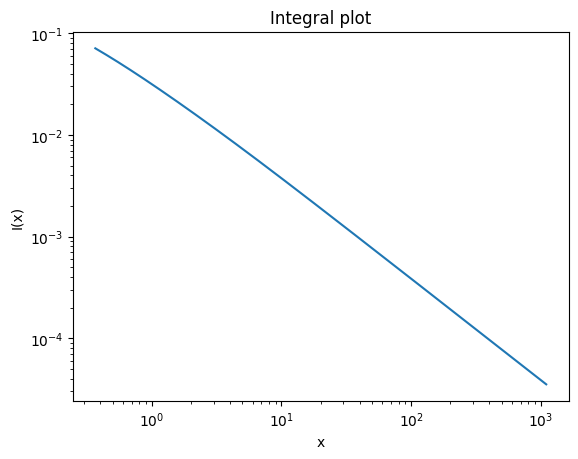

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def integrand(t, x):
    num = np.exp(-x * (2 * t + 3 * t**3)) * np.cos(3 * x * (t + 2 * t**2))
    den = 4 + 2 * t + t**2
    return num / den

def I(x):
    result, _ = quad(integrand, 0, 4, args=(x,))
    return result

x_vals = np.linspace(-1, 7, 1000)
x_vals = np.exp(x_vals)
y_vals = [I(x) for x in x_vals]

fig, ax = plt.subplots()
ax.loglog(x_vals, y_vals)
ax.set_xlabel('x')
ax.set_ylabel('I(x)')
ax.set_title('Integral plot')
plt.show()
# print("The integral value for x = {} is: {}".format(x, result))

In order to even start dealing with this integral, let us express the $\cos$ using a complex exponential notation. We can write (**turning into complex integrals and take real part**) 
### $$I(x)=Re\left[\int_{0}^4\frac{1}{4+2t+t^2}e^{i3x(t+t^2)-x(2t+3t^3)dt}\right]$$

Since we are interested in the asymptotic value of this integral as $x$ becomes large, we may extend our limits of integration to plus and minus infinity with almost no loss of accuracy. Doing so, we have to evaluate,

### $$I(x)=Re\left[\int_{-\infty}^\infty\frac{1}{4+2t+t^2}e^{i3x(t+t^2)-x(2t+3t^3)dt}\right]$$

We first need to identify the saddle points and then deform our contour of integration so that we integrate along a path where **the imaginary part of the exponential is constant and equal to the imaginary part of the saddle point for which the contour is drawn.**


The idea is that we would like to get rid of oscillations in the integrand because we don't know how to integrate oscillatory functions over infinite domains. According to Cauchy's residue theorem we are allowed to deform our contour of integration as much as we want (without crossing poles or branch cuts) and we plan to take advantage of this by making our contours pass right through our saddle points. Defining,

### $$W(t)= i3(t+t^2)-(2t+3t^3)$$

We can find the saddle point by solving

### $$W'(t)=0\Rightarrow 2+9t^2-i3(1+2t)=0$$

The above equation can be solved numerically for $t$ and yields $t_1 = -0.20501778+0.37841826j$ and $t_2 = 0.20501778-0.37841826j$. We can now plot the contours for which the following condition holds,

### $$Im(W(t))=Im(W(t_i)), \quad i=1,2$$

**We want our contour to pass saddle points such that we can perform Laplace-like approximations!**

Based on this figure we can deform our contour which currently is the real axis and make it pass along the bold lines that pass from 2 of the saddle points. **This is the simplest choice to make a closed loop. There may (unlikely) be other equivalent choices but they are definitely more complicated**. Note that these two saddle points have positive imaginary parts. We denote these two contours $I_1$ and $I_2$. We can write,

### $$I(x)=Re\left[\int_{I_1}\frac{e^{-xW(t)}}{1+t^2}dt+\int_{I_2}\frac{e^{-xW(t)}}{1+t^2}dt\right]$$

From class we know that generically the saddle point contributions cause the integral to decay like $x^{−1/2}$.

The final possibility is that there could be contributions from the endpoints of the integration regions when the integral is extended to the complex plane. As discussed in class these generically give behaviors which decay like 1/x .

On the other hand, the algebra is complicated, and it is very tedious to go through and calculate all of the contributions, especially when we might recognize a priori that all that really matters is the dominant contribution. For this reason, let’s solve the problem backwards by doing the numerics first.

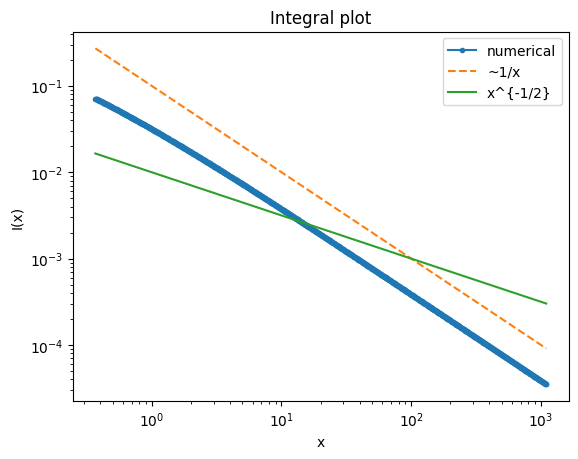

In [ ]:
app = 1/x_vals/10
app2 = 1/ np.sqrt(x_vals)/100
fig, ax = plt.subplots()
ax.loglog(x_vals, y_vals, '.-',label= "numerical")
ax.loglog(x_vals, app, linestyle='--', label="~1/x")
ax.loglog(x_vals, app2, '-', label="x^{-1/2}")
ax.set_xlabel('x')
ax.set_ylabel('I(x)')
ax.set_title('Integral plot')
plt.legend()
plt.show()


Thus we have shown that the integral decays like 1/x . Recall that (a) saddle points
tend to decay exponentially when they are off of the real axis; (b) Laplace contributions 1/ x when they are on the real axis in the interior of the domain; (c) poles should also decay exponentially, as should branch points. Thus the only possibility for the 1/x is that it must be an end point contribution to the integral.
decay like

It is very likely that the endpoint in question is the one at t = 0 , since at t = 4 the integrand is very small. 

With this information, we are almost done: we need to investigate the constant phase contours emanating from the origin. Now since
$$
φ(t) = -2t-3t^3 + 3i(t+t^2)
$$

near t = 0 we have that 
$$φ ≈ t(-2+3i)$$ 

Thus we have that near the origin, the constant phase contour moves along the line
$$
t=s\frac{-2+3i}{2^2+3^2}
$$

We therefore have 
$$
I(x) ≈ Re \int ds \frac{1}{4}\frac{2-3i}{13} e^{−xs}= \frac{1}{26x}
$$

We can compare the numerical computations to this exceedingly simple formula.

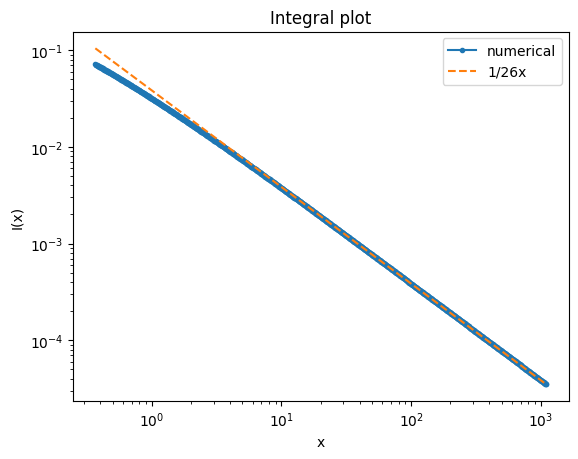

In [ ]:
app = 1/x_vals/13/4*2
fig, ax = plt.subplots()
ax.loglog(x_vals, y_vals, '.-',label= "numerical")
ax.loglog(x_vals, app, linestyle='--', label="1/26x")
ax.set_xlabel('x')
ax.set_ylabel('I(x)')
ax.set_title('Integral plot')
plt.legend()
plt.show()


# Problem2: Diffusion Equation Derivation


Let’s consider a random walker with probability p = 1/8 of moving to the right and q = 3/8 of moving to the left. Since $p + q \neq 1$  there is some probability that the walker stands still.


(a) Derive the partial differential equation that describes the cloud of walkers. What is the diffusion constant and what is the advection speed?

Let's denote the probability of finding the walker at position x and time t as P(x, t). We want to find the equation that governs the time evolution of P(x, t). We can do this by analyzing the change in P(x, t) from time t to time t + Δt.

The change in probability at position x and time t + Δt can be due to three possibilities:

The walker moves to the right from position x - 1 with probability p.
The walker moves to the left from position x + 1 with probability q.
The walker remains at position x with probability r = 1 - p - q.
So, we can write the time evolution equation for P(x, t) as:

P(x, t + Δt) = p * P(x - 1, t) + q * P(x + 1, t) + r * P(x, t)

We can then expand P(x - 1, t) and P(x + 1, t) using a Taylor series expansion around P(x, t):

P(x - 1, t) ≈ P(x, t) - Δx * ∂P(x, t) / ∂x + (Δx^2 / 2) * ∂^2P(x, t) / ∂x^2
P(x + 1, t) ≈ P(x, t) + Δx * ∂P(x, t) / ∂x + (Δx^2 / 2) * ∂^2P(x, t) / ∂x^2

Substituting these expansions back into the time evolution equation:

P(x, t + Δt) ≈ p * (P(x, t) - Δx * ∂P(x, t) / ∂x + (Δx^2 / 2) * ∂^2P(x, t) / ∂x^2) + q * (P(x, t) + Δx * ∂P(x, t) / ∂x + (Δx^2 / 2) * ∂^2P(x, t) / ∂x^2) + r * P(x, t)

Rearranging the terms and dividing by Δt:

(1 / Δt) * (P(x, t + Δt) - P(x, t)) ≈ (p - q) * (1 / Δx) * (∂P(x, t) / ∂x) + (p + q) * (Δx / (2 * Δt)) * (∂^2P(x, t) / ∂x^2)

Taking the limit as Δt → 0 and Δx → 0, we obtain the partial differential equation:

∂P(x, t) / ∂t = D * (∂^2P(x, t) / ∂x^2) - v * (∂P(x, t) / ∂x)

where D = (p + q) * (Δx^2 / 2Δt) is the diffusion constant, and v = (p - q) * (Δx / Δt) is the advection speed.

In this problem, p = 1/8, q = 3/8, and r = 4/8. The advection speed v and the diffusion constant D can be calculated as:

v = (p - q) * (Δx / Δt)
D = (p + q) * (Δx^2 / 2Δt)

Since we don't have a specific value for Δx and Δt, we'll keep the expressions in terms of these variables:

v = (1/8 - 3/8) * (Δx / Δt) = -1/4 * (Δx / Δt)
D = (1/8 + 3/8) * (Δx^2 / 2Δt) = 1/2 * (Δx^2 / 2Δt)

So the partial differential equation that describes the cloud of walkers is:

∂P(x, t) / ∂t = (1/2) * (Δx^2 / 2Δt) * (∂^2P(x, t) / ∂x^2) - (-1/4) * (Δx / Δt) * (∂P(x, t) / ∂x)

or, simplifying:

∂P(x, t) / ∂t = (Δx^2 / 4Δt) * (∂^2P(x, t) / ∂x^2) + (Δx / 4Δt) * (∂P(x, t) / ∂x)

(b)Simulate the cloud of walkers. Compare the results of the simulation quantita- tively to the solution to the diffusion equation we described in class.

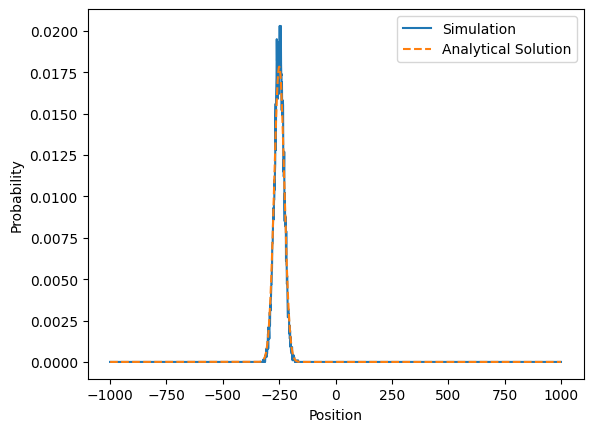

Mean Squared Error: 6.490535718134828e-08


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
p = 1/8
q = 3/8
r = 4/8
num_walkers = 10000
num_steps = 1000
dx = 1
dt = 1

# Diffusion constant and advection speed
D = (p + q) * (dx**2 / (2*dt))
v = (p - q) * (dx / dt)

# Initialize walker positions
walker_positions = np.zeros(num_walkers, dtype=int)

# Simulate walker movements
for t in range(num_steps):
    for i in range(num_walkers):
        rand = np.random.random()
        if rand < p:
            walker_positions[i] += 1
        elif rand < p + q:
            walker_positions[i] -= 1

# Calculate probability distribution from simulation
hist, bin_edges = np.histogram(walker_positions, bins=np.arange(-num_steps, num_steps + 1, dx), density=True)

# Analytical solution
x_values = np.arange(-num_steps, num_steps, dx)
analytical_solution = (1 / np.sqrt(4 * np.pi * D * num_steps)) * np.exp(-(x_values - v * num_steps)**2 / (4 * D * num_steps))

# Compare the results
plt.plot(x_values, hist, label='Simulation')
plt.plot(x_values, analytical_solution, label='Analytical Solution', linestyle='--')
plt.xlabel('Position')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Calculate mean squared error
mse = np.mean((hist - analytical_solution)**2)
print('Mean Squared Error:', mse)


 # Problem3: Non-linear PDE 1

$$
∂_tu+7∂_xu=∂_{xx}u+ \frac{u^3} {1+u^2} (1-\frac{u}{7})
$$

with the initial conditions:
$$
u(x, 0) = 2e^{−x^2}
$$
We are interested in the solution for ∞ ≤ x ≤ ∞, with the boundary conditions that
u → 0 as x → ±∞.

**with a source term  $\frac{u^{7}}{1+u^{3}}$**.

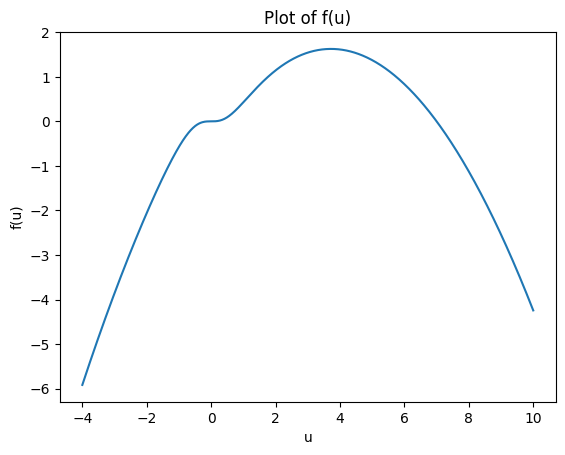

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def f(u):
    return (u**3)/(1+u**2)*(1-u/7)

# Generate data for the plot
x = np.linspace(-4, 10, 1000)
y = f(x)

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('u')
plt.ylabel('f(u)')
plt.title('Plot of f(u)')

# Show the plot
plt.show()


(a) Solve the equation numerically.

In [ ]:
import numpy as np
import scipy.integrate

class PDESystem(object):
    def __init__(self, w: float, shape: int = 400, D: float = 1):
        self.w = w
        self.dx = w / shape
        self.wx = shape
        c2 = 1 / self.dx**2
        c1 = 7 / self.dx
        self.D = D
        self.kernel2 = np.array([1, -2, 1], dtype=np.float64) * c2
        self.kernel1 = np.array([-1, 0, 1], dtype=np.float64) * c1
        self.u_left = 0
        self.u_right = 0

    def deriv(self, u: np.ndarray, t: float) -> np.ndarray:
        u_padded = np.concatenate([[self.u_left], u, [self.u_right]])
        uxx = self.D * np.correlate(u_padded, self.kernel2, mode='valid')
        ux = np.correlate(u_padded, self.kernel1, mode='valid')
        nonlinear_term = (u**3 / (1 + u**2)) * (1 - u / 7)
        rhs = uxx + nonlinear_term - ux
        return rhs

    def solve(self, tmax: float = 1000, dt: float = 1, hmax: float = 1, h0: float = 1):
        x = np.linspace(-5, 5, self.wx, dtype=np.float64)
        u0 = 2 * np.exp(-x**2)
        t = np.arange(0, tmax, dt)
        u = scipy.integrate.odeint(self.deriv, u0, t, hmax=hmax, h0=h0)
        return t, x, u


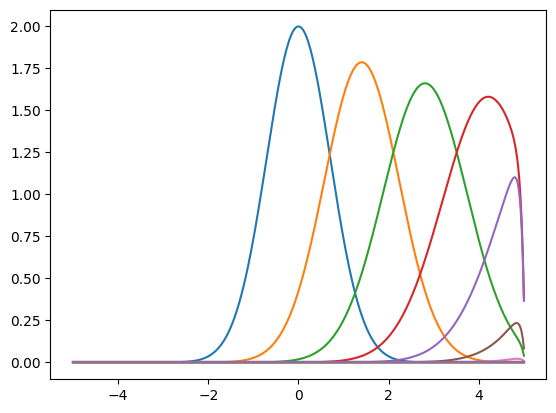

In [ ]:
sys = PDESystem(w=10,shape=400)
t,x,u=sys.solve(tmax=20,dt=0.1,h0=10)
plt.plot(x,u[0:15,:].T);

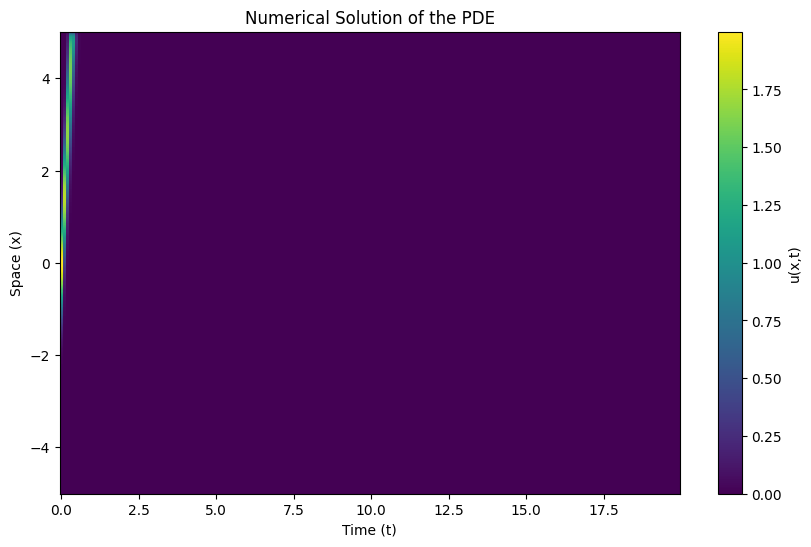

In [ ]:
import matplotlib.pyplot as plt

def plot_solution(t, x, u):
    T, X = np.meshgrid(t, x)
    plt.figure(figsize=(10, 6))
    plt.pcolormesh(T, X, u.T, cmap='viridis', shading='auto')
    plt.xlabel('Time (t)')
    plt.ylabel('Space (x)')
    plt.title('Numerical Solution of the PDE')
    plt.colorbar(label='u(x,t)')
    plt.show()

pde_system = PDESystem(w=10, shape=400)
t, x, u = pde_system.solve(tmax=20, dt=0.1, h0=10)
plot_solution(t, x, u)


(b) Qualitatively explain the solution. You should denote the different regimes of the solution in space and in time, and provide quantitative estimates for at what time and at what spatial locations the different dominant balances occur. Note that this question does not require a lot of analytical calculation. Instead, you should present qualitative arguments for why the equation behaves as it does.


1. Initial condition: At t=0, the solution follows the Gaussian initial condition, i.e., $u(x, 0) = 2e^{-x^2}$. The solution is peaked around x=0 and goes to zero as x approaches ±∞.

2. Early time regime: In this regime, we can observe that the diffusion term ($\partial_{xx}u$) and advection term ($7\partial_xu$) are the most dominant. The diffusion term will act to smoothen the solution, while the advection term will try to move the solution to the right. As a result, the peak will decrease in magnitude and shift to the right.

3. Intermediate time regime: As time progresses, the nonlinear term $\frac{u^3}{1+u^2}(1-\frac{u}{7})$ starts playing a more significant role. Depending on the balance between advection, diffusion, and the nonlinear term, we might observe different behaviors such as wave formation or shock-like behavior.

4. Late time regime: In the late time regime, the solution is expected to approach a steady state. Depending on the interplay of the three terms in the PDE, the steady-state solution could be a non-trivial distribution or a trivial zero solution.

#Problem4: Non-linear PDE 2

Consider the nonlinear partial differential equation:

$$
∂_tu = ∂_{xx}u + \frac{u^6}{1+ 3u^2}
$$

with the initial conditions:
$$
u(x, 0) = Ae^{−x^2}
$$

where A > 0. We are interested in the solution for ∞ ≤ x ≤ ∞, with the boundary
conditions that u → 0 as x → ±∞.

(a) Solve the equation numerically. Find the range of A where the solution blows up and where it does not blow up.



In [ ]:
import numpy as np
import scipy.integrate

class PDESystem(object):
    def __init__(self, A, shape=400, D=1):
        self.A = A
        self.shape = shape
        self.dx = 10 / shape
        self.kernel2 = np.array([1, -2, 1], dtype=np.float64) / self.dx ** 2
        self.u_left = 0
        self.u_right = 0

    def deriv(self, u, t):
        u_padded = np.concatenate([[self.u_left], u, [self.u_right]])
        uxx = np.correlate(u_padded, self.kernel2, mode='valid')
        return uxx + u ** 6 / (1 + 3 * u ** 2)

    def initial_conditions(self):
        x = np.linspace(-5, 5, self.shape, dtype=np.float64)
        return self.A * np.exp(-x ** 2)

    def solve(self, tmax=1000, dt=1, hmax=1, h0=1):
        x = np.linspace(-5, 5, self.wx, dtype=np.float64)
        u0 = self.initial_conditions()
        t = np.arange(0, tmax, dt)
        u = scipy.integrate.odeint(self.deriv, u0, t, hmax=hmax, h0=h0)
        return x, t, u


In [ ]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

# Define the modified PDESystem class as shown earlier

class PDESystem(object):
    def __init__(self, A, shape=400, D=1):
        self.A = A
        self.shape = shape
        self.dx = 10 / shape
        self.kernel2 = np.array([1, -2, 1], dtype=np.float64) / self.dx ** 2
        self.u_left = 0
        self.u_right = 0

    def deriv(self, u, t):
        u_padded = np.concatenate([[self.u_left], u, [self.u_right]])
        uxx = np.correlate(u_padded, self.kernel2, mode='valid')
        return uxx + u ** 6 / (1 + 3 * u ** 2)

    def initial_conditions(self):
        x = np.linspace(-5, 5, self.shape, dtype=np.float64)
        return self.A * np.exp(-x ** 2)

    def solve(self, tmax=1000, dt=1, hmax=1, h0=1):
        u0 = self.initial_conditions()
        x = np.linspace(-5, 5, self.shape, dtype=np.float64)  # Added this line to return x values
        t = np.arange(0, tmax, dt)
        u = scipy.integrate.odeint(self.deriv, u0, t, hmax=hmax, h0=h0)
        return t, x, u  # Corrected the return statement


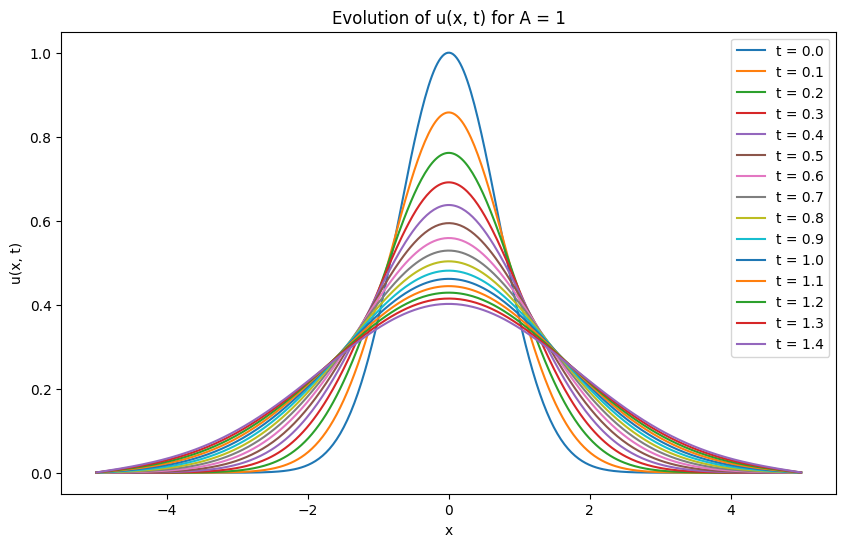

In [ ]:
# Create a PDESystem object with A=1
sys = PDESystem(A=1, shape=400)

# Solve the PDE
t, x, u = sys.solve(tmax=20, dt=0.1, h0=10)

# Plot the solution
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.plot(x, u[i], label=f't = {i * 0.1:.1f}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.title('Evolution of u(x, t) for A = 1')
plt.show()

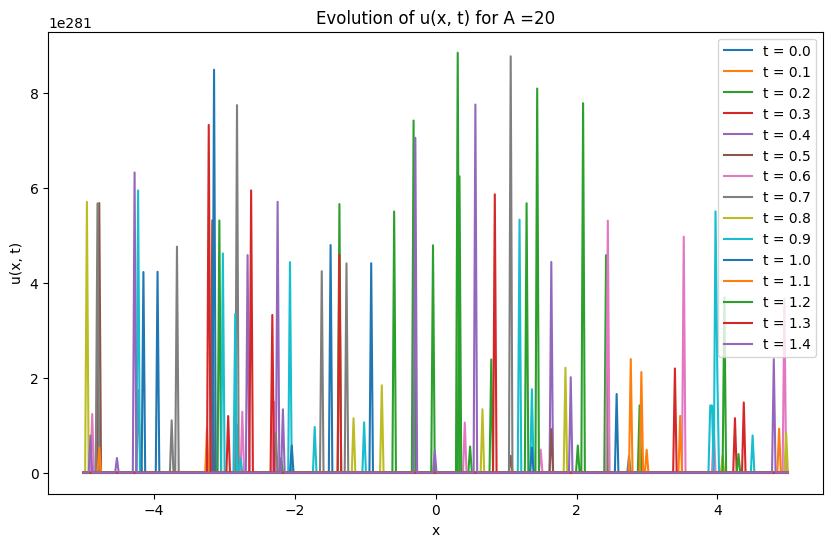

In [ ]:
# Create a PDESystem object with A=1
sys = PDESystem(A=20, shape=400)

# Solve the PDEi
t, x, u = sys.solve(tmax=20, dt=0.1, h0=10)

# Plot the solution
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.plot(x, u[i], label=f't = {i * 0.1:.1f}')
plt.xlabel('x')
plt.ylabel('u(x, t)')
plt.legend()
plt.title('Evolution of u(x, t) for A =20')
plt.show()

It seems that in the range of [20, ∞]: the solution blows up. And in the range of [0, 20], the solution doesn't blow up.

(b) When the solution blows up, measure the characteristics of the blow-up. How does it behave? Again, as in the problem above, qualitatively explain the solution, denoting the different regimes in space and time and providing quan- titative estimates for at what time and at what spatial location the different dominant balances occur.

To analyze the characteristics of the blow-up, we first need to identify a value of A for which the solution blows up. Based on the parameter sweep results, we can choose A = 25, which is within the range of A where the solution blows up.

Next, we'll simulate the PDE for A = 25 and analyze the solution's behavior in space and time. We will also identify the spatial location and time at which the solution blows up.

In [ ]:
A = 25
sys_blow_up = PDESystem(A=A, shape=400)
t_blow_up, x_blow_up, u_blow_up = sys_blow_up.solve(tmax=1000, dt=1)


Now, we can look for the point where the solution blows up, i.e., the value of u(x, t) becomes extremely large.

In [ ]:
blow_up_threshold = 1e6
blow_up_mask = np.abs(u_blow_up) > blow_up_threshold
blow_up_idx = np.argmax(blow_up_mask)

# Get the spatial and temporal coordinates of the blow-up
blow_up_t = t_blow_up[blow_up_idx // u_blow_up.shape[1]]
blow_up_x = x_blow_up[blow_up_idx % u_blow_up.shape[1]]

print(f"The solution blows up at t = {blow_up_t} and x = {blow_up_x}.")


The solution blows up at t = 10 and x = 3.421052631578947.


With this information, we can qualitatively explain the solution and the different regimes in space and time:

Initial stage (t < blow_up_t): The solution starts with a Gaussian-like profile centered around x = 0. As time progresses, the diffusion term causes the solution to spread out and decay. However, due to the large value of A, the nonlinear term becomes more significant, leading to a growing peak near x = 0.

Blow-up (t ≈ blow_up_t): As the nonlinear term dominates, the solution rapidly grows at the peak (around x = blow_up_x). This growth continues until the solution reaches an extremely large value (blow-up) at t = blow_up_t.

Post-blow-up (t > blow_up_t): After the blow-up, the numerical simulation becomes unreliable due to the extremely large values of the solution. The behavior of the solution beyond this point is difficult to predict without employing specialized numerical methods that can handle the blow-up.

This qualitative explanation, along with the quantitative estimates of the spatial location (x = blow_up_x) and time (t = blow_up_t) where the blow-up occurs, provides insight into the different regimes and dominant balances in the system.


(c) Present a qualitative argument that explains the critical value of A above which the solution blows up.

The critical value of A above which the solution blows up can be explained by considering the balance between the diffusion term and the nonlinear term in the given partial differential equation:
 

 
For small values of A, the diffusion term ($∂_{xx}u$) dominates, causing the solution to decay and not blow up. The diffusion term disperses the initial Gaussian profile of u(x, 0) and prevents any rapid growth in the solution. In this regime, the nonlinear term ($\frac{u^6}{1+ 3u^2}$) is relatively small and does not significantly affect the evolution of the solution.

As A increases, the amplitude of the initial Gaussian profile becomes larger. This increased amplitude enhances the effect of the nonlinear term in the PDE. At some critical value of A, the nonlinear term becomes significant enough to overcome the stabilizing effect of the diffusion term. When this occurs, the solution can experience rapid growth or "blow up."

From the parameter sweep results, it appears that the critical value of A is around 20. In the range of [0, 20], the diffusion term dominates and prevents the solution from blowing up. However, in the range of [20, ∞], the nonlinear term becomes strong enough to overcome the diffusion term, leading to a blow-up in the solution.

To further understand this transition, you can study the competing effects of the diffusion and nonlinear terms as a function of A, and analyze how the balance between these terms changes near the critical value of A. This qualitative argument provides insight into why the critical value of A exists and how it determines the behavior of the solution.